In [7]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, iterations=200)
    options = {'node_color':'pink', 'alpha':1, 'node_size':2000, 'width':0.002, 'font_color':'darkred', 
               'font_size':25, 'arrows':True, 'edge_color':'brown', 
               'arrowstyle':'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    plt.show()

In [138]:
class DiGraph:
    def __init__(self):
        self.g = {}
    
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already is graph")
            
        self.g[node] = []
        
    def add_edge(self, src, dest):
        if src not in self.g:
            raise ValueError("Source not in graph")
            
        if dest not in self.g:
            raise ValueError("Destination not in graph")

        src_edges = self.g[src]
        if dest in src_edges:
            return
        
        src_edges.append(dest)
        
    def traverse_graph(self, start):
        que = [ start ]
        visited = []
        
        while que:
            current_node = que.pop(0)
            
            if current_node in visited:
                continue
            
            print(current_node)
            visited.append(current_node)
            
            neighbors = self.g[current_node]
            for n in neighbors:
                que.append(n)
                
    def find_path(self, start, end, path=[]):
        if start not in self.g:
            raise ValueError("Source or start is not in graph")
            
        if end not in self.g:
            raise ValueError("Destination or end is not in graph")

        print(start, ',', end)
            
        path = path + [start]
        
        if start == end:
            return path
                
        for neighbor in self.g[start]:
            if neighbor not in path:
                newpath = self.find_path(neighbor, end, path)
                if newpath:
                    return newpath
                
        return None
    
    def find_all_paths(self, start, end, path=[]):
        if start not in self.g:
            raise ValueError("Source or start not in graph")
            
        if end not in self.g:
            raise ValueError("Destination or end not in graph")

        print(start, ",", end)
        
        path = path + [start]
        all_paths = []
        
        if start == end:
            return [ path ]

        for neighbor in self.g[start]:
            if neighbor not in path:
                all_newpaths = self.find_all_paths(neighbor, end, path)
                for newpath in all_newpaths:
                    all_paths.append(newpath)
                    
        return all_paths
    
    def find_shortest_path(self, start, end, path=[]):
        if start not in self.g:
            raise ValueError("Source or start not in graph")
            
        if end not in self.g:
            raise ValueError("Destination or end not in graph")
            
        path = path + [start]
        
        if start == end:
            return path
        
        shortest = None
        
        for neighbor in self.g[start]:
            newpath = self.find_shortest_path(neighbor, end, path)
            if newpath:
                if shortest is None or len(newpath) < len(shortest):
                    shortest = newpath
                    
        return shortest
    
    def find_shortest_path_different_method(self, start, end):
        all_paths = self.find_all_paths(start, end)
        all_paths.sort(reverse=True)
        
        if len(all_paths) == 0:
            return []
        shortest = all_paths[0]
        all_shortest = [shortest]
        
        for path in all_paths:
            if path in all_shortest:
                continue
                
            if len(path) <= len(shortest):
                shortest = path
                all_shortest.append(path)
        
        if len(all_shortest) == 1:
            return all_shortest[0]
        
        if len(all_shortest) > 1:
            return all_shortest
        
    
    def draw_graph(self):
        G = nx.DiGraph()
        
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest)
                
        draw_graph_with_nx(G)
        

In [139]:
g = DiGraph()
nodes = ['a', 'b', 'c', 'd', 'e', 'f']
for n in nodes:
    g.add_node(n)
    
edges = [
    ('a', 'b'),
    ('a', 'c'),
    ('b', 'c'),
    ('b', 'd'),
    ('c', 'd'),
    ('d', 'c'),
    ('e', 'f'),
    ('f', 'c')
]
for e in edges:
    g.add_edge(e[0], e[1])

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}


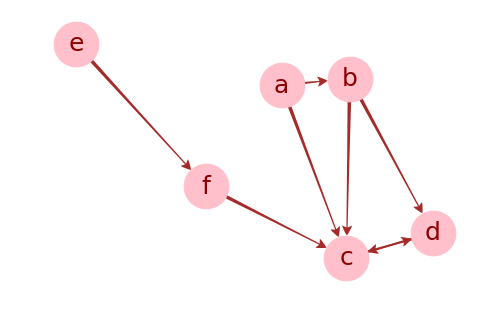

In [140]:
print(g.g)
g.draw_graph()

In [141]:
g.traverse_graph('e')

e
f
c
d


In [142]:
g.traverse_graph('a')

a
b
c
d


In [143]:
g.find_path('a', 'd')

a , d
b , d
c , d
d , d


['a', 'b', 'c', 'd']

In [144]:
g.find_all_paths('e', 'b')

e , b
f , b
c , b
d , b


[]

In [150]:
g.find_shortest_path('a', 'd')

['a', 'b', 'd']

In [151]:
g.find_shortest_path_different_method('e', 'b') 

e , b
f , b
c , b
d , b


[]

In [152]:
g.find_shortest_path_different_method('a', 'd')

a , d
b , d
c , d
d , d
d , d
c , d
d , d


[['a', 'c', 'd'], ['a', 'b', 'd']]

In [153]:
g.find_shortest_path_different_method('e', 'c')

e , c
f , c
c , c


['e', 'f', 'c']